In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = "data_raw/top_rated_movies(tmdb).csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.sample(5)

,id,title,overview,release_date,popularity,vote_average,vote_count
6272,716258,Black Box,After losing his wife and his memory in a car ...,2020-10-06,3.580,6.396,542
2769,24615,Aloha Scooby-Doo!,The Mystery Gang goes to Hawaii for the Big Ka...,2005-02-08,3.531,7.131,438
1317,3001,How to Steal a Million,A woman must steal a statue from a Paris museu...,1966-07-13,3.531,7.500,601
805,359784,Maudie,Canadian folk artist Maud Lewis falls in love ...,2016-06-16,3.535,7.700,513
1791,19100,Those Happy Days,"Set in 1992, a manager Vincent has to run a ch...",2006-06-28,3.825,7.400,1041


## Year with best film released

In [5]:
#Checking for missing values
data['release_date'].isna().sum()

2

In [6]:
null_values = data[data['release_date'].isna()]
print(null_values)

           id   title                                           overview  \
5208  1198870  Return  A girl is at school. Suddenly it's as if she c...   
5435   733668  Return  Eyüp decides to cross mount Ararat looking for...   

     release_date  popularity  vote_average  vote_count  
5208          NaN       3.531         6.616         391  
5435          NaN       3.531         6.564         380  


In [7]:
#deleting those missing values 
data = data.dropna(subset=['release_date'])
#checking the operation done
print("missing  release data values:\t",data['release_date'].isna().sum())

missing  release data values:	 0


In [8]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [9]:
#Checcking all the year dates
np.sort(data['release_date'].dt.year.unique())

array([1902, 1903, 1915, 1916, 1918, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025], dtype=int32)

In [16]:
# Ensure release_date is in datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Group by year and compute the mean vote_average
average_votes_per_year = data.groupby(data['release_date'].dt.year)['vote_average'].mean()

# Display the results
print(average_votes_per_year)

release_date
1902    7.900000
1903    7.005000
1915    6.000000
1916    7.100000
1918    7.332000
          ...   
2021    6.907193
2022    6.880349
2023    6.943177
2024    6.849226
2025    6.844333
Name: vote_average, Length: 111, dtype: float64


In [20]:
average_votes_per_year.values

array([7.9       , 7.005     , 6.        , 7.1       , 7.332     ,
       7.917     , 7.9865    , 7.7       , 7.7       , 7.9465    ,
       7.56666667, 7.95      , 7.67033333, 7.74      , 7.416     ,
       7.3       , 7.6696    , 7.22      , 7.3215    , 7.315     ,
       7.3985    , 7.794     , 7.23333333, 7.42416667, 7.66983333,
       7.62344444, 7.30433333, 7.1912    , 7.76675   , 7.3545    ,
       7.5699    , 7.54130769, 7.32675   , 7.50690909, 7.405     ,
       7.56118182, 7.3371    , 7.79525   , 7.33631579, 7.454     ,
       7.3955    , 7.4366    , 7.65011111, 7.38623077, 7.49253333,
       7.47533333, 7.51310526, 7.61172414, 7.38458333, 7.41124   ,
       7.2661    , 7.39296154, 7.28365217, 7.13003333, 7.17805   ,
       7.15054545, 7.1035    , 7.04487879, 7.26276744, 7.12052632,
       7.18324138, 7.12094118, 6.95519355, 6.87338462, 7.07902857,
       6.9038    , 6.91305769, 6.96521569, 6.90475   , 6.84836765,
       6.80487838, 6.85880282, 6.89885714, 6.86004545, 6.82271

In [33]:
number_ratings_per_year = data.groupby(data['release_date'].dt.year)['vote_count'].sum()

In [34]:
print(number_ratings_per_year)

release_date
1902      1820
1903       631
1915       542
1916       342
1918       327
         ...  
2021    519681
2022    423169
2023    337106
2024    197742
2025      7944
Name: vote_count, Length: 111, dtype: int64


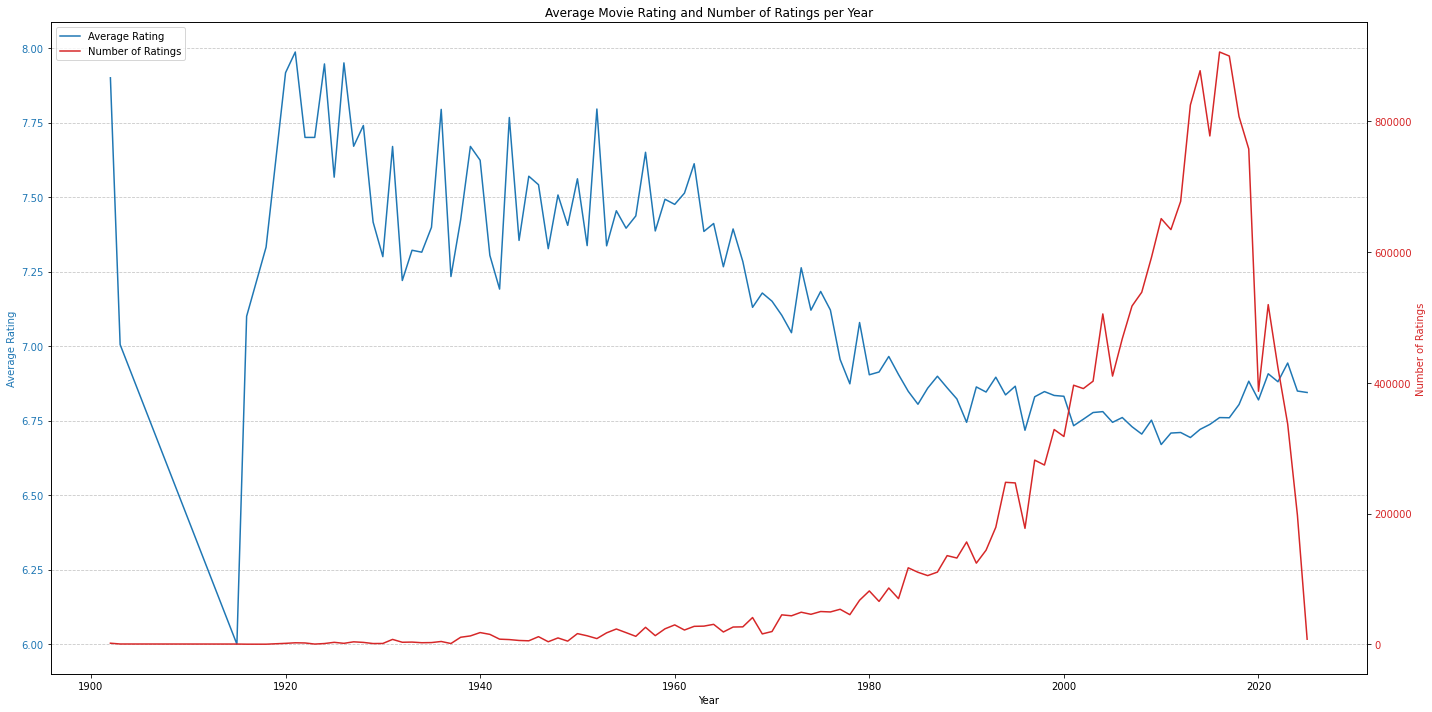

In [38]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot average votes on the first y-axis
color1 = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Rating", color=color1)

# Convert the Series to numpy arrays
ax1.plot(average_votes_per_year.index.to_numpy(), average_votes_per_year.values, color=color1, label='Average Rating')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for number of ratings
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("Number of Ratings", color=color2)

# Convert the Series to numpy arrays for the number of ratings
ax2.plot(number_ratings_per_year.index.to_numpy(), number_ratings_per_year.values, color=color2, label='Number of Ratings')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title("Average Movie Rating and Number of Ratings per Year")
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

